# Машинное обучение и анализ данных
## Четвертая неделя
## Центральная предельная теорема своими руками

In [13]:
import numpy as np
import math
from matplotlib import pylab as plt
from scipy.stats import semicircular
from scipy.stats import norm
%matplotlib inline

## A Gompertz continuous random variable

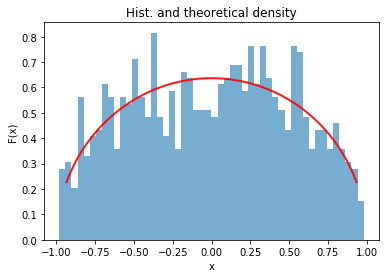

In [17]:
func = semicircular()
r = func.rvs(size=1000)
plt.hist(r, 50, normed=True, alpha=0.6) # Сгенерируем 1000 значений выбранного распределения и построим гистограмму

x = np.linspace(func.ppf(0.01), func.ppf(0.99), 1000) 
plt.plot(x, func.pdf(x), 'r-', lw=2, alpha=0.9, label='gompertz pdf') # Построим график теоретической плотности 
plt.title("Hist. and theoretical density")                            # выбранного распределения
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

У исходного распределения $E = 0$, значит по ЦПТ и у нормальных распределений, которыми мы будем описывать распределения выборочных средних так же $E = 0$. 
У исходного распределения $D = 1 / 4 = 0.25$, значит для наших $$D_{size} = \frac{0.25}{size}.$$

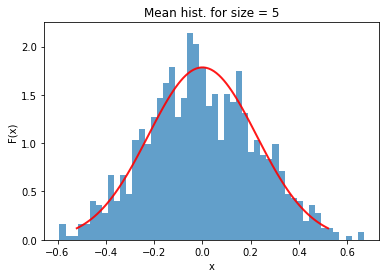

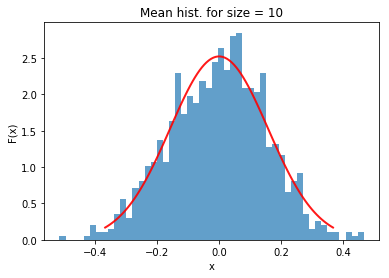

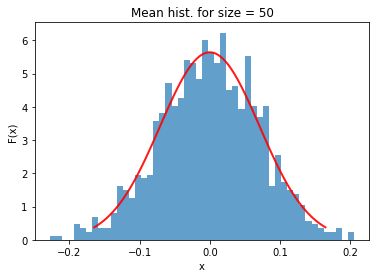

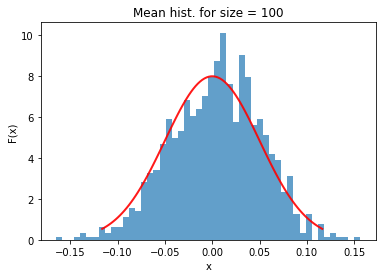

In [16]:
l = [5, 10, 50, 100] # массив размеров генерируемых выборок

for size in l:
    var_means = []
    for i in range(1000):
        x = func.rvs(size=size) # Для каждого n будем генерировать выборку данного размера 
        var_means.append(x.mean()) # и считать выборочное среднее
    plt.title("Mean hist. for size = " + str(size)) 
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.hist(var_means, 50, normed=True, alpha=0.7) # Строим гистограмму распределения средних
    
    mean = 0 
    variance = 0.25 / size 
    norm_rv = norm(loc=mean, scale=math.sqrt(variance)) # Вычислим параметры распределения средних
    x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 100)
    plt.plot(x, norm_rv.pdf(x), 'r-', lw=2, alpha=0.9, label='norm pdf')
    plt.show()

## Вывод

Чем больше размер выборок, тем меньше становится их дисперсия. 
Точность приближения с ростом размера меняется, хоть и далеко не кардинально, в лучшую сторону.